In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [3]:
train_images,test_images = train_images/255.0,test_images/255.0

In [4]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)


In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','hourse','ship','truck']

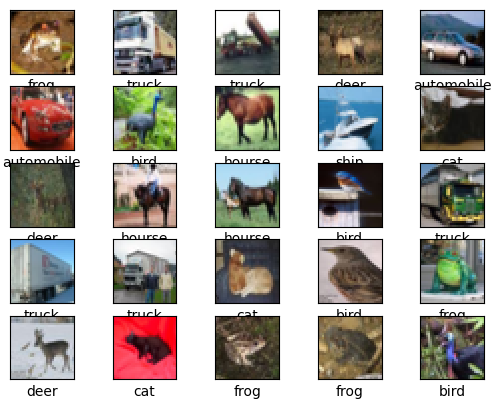

In [6]:
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

In [7]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
Total params: 24880 (97.19 KB)
Trainable params: 24880 (

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 256)               0

In [11]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])

history = model.fit(train_images,train_labels,epochs = 5,validation_data = (test_images,test_labels))


Epoch 1/5


1563/1563 [==============================] - 58s 35ms/step - loss: 1.6162 - accuracy: 0.4060 - val_loss: 1.4046 - val_accuracy: 0.4920
Epoch 2/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3039 - accuracy: 0.5345 - val_loss: 1.2506 - val_accuracy: 0.5592
Epoch 3/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1849 - accuracy: 0.5796 - val_loss: 1.1490 - val_accuracy: 0.5976
Epoch 4/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1079 - accuracy: 0.6070 - val_loss: 1.1429 - val_accuracy: 0.5932
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0469 - accuracy: 0.6285 - val_loss: 1.0406 - val_accuracy: 0.6221


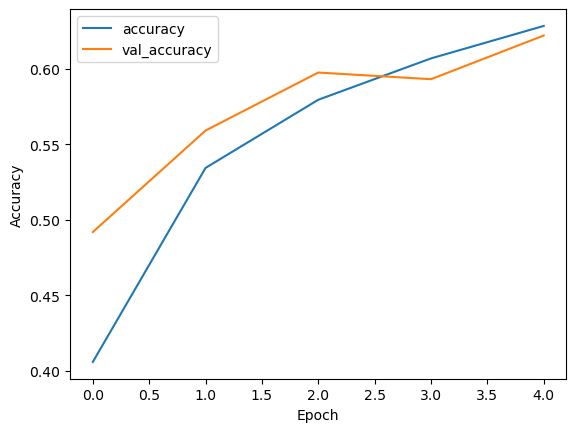

In [12]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 1.0406 - accuracy: 0.6221


In [14]:
train_loss,train_acc = model.evaluate(train_images,train_labels)

1563/1563 [==============================] - 21s 13ms/step - loss: 0.9786 - accuracy: 0.6500


# MNIST Data

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_image,train_labels), (test_image,test_labels) = mnist.load_data()

In [16]:
train_image, test_image = train_image / 255.0, test_image / 255.0

In [17]:
print("Train image shape:", train_image.shape)
print("Train labels shape:", train_labels.shape)

Train image shape: (60000, 28, 28)
Train labels shape: (60000,)


In [18]:
class_names = [str(i) for i in range(10)]

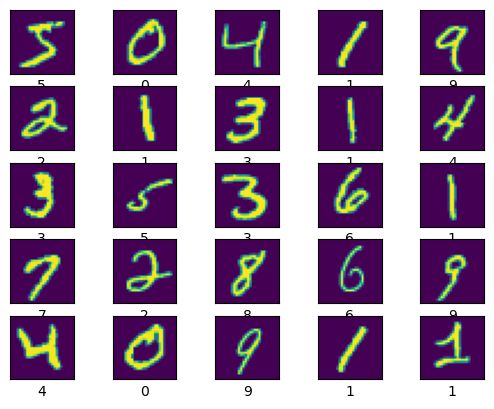

In [19]:
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_image[i])
    plt.xlabel(class_names[train_labels[i]])

In [27]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
Total params: 37280 (145.62 KB)
Trainable params: 3728

In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 flatten_2 (Flatten)         (None, 288)              

In [31]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])

history = model.fit(train_image,train_labels,epochs = 5,validation_data = (test_image,test_labels))

Epoch 1/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1601 - accuracy: 0.9512 - val_loss: 0.0422 - val_accuracy: 0.9867
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0515 - accuracy: 0.9837 - val_loss: 0.0422 - val_accuracy: 0.9869
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0350 - val_accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0288 - val_accuracy: 0.9909


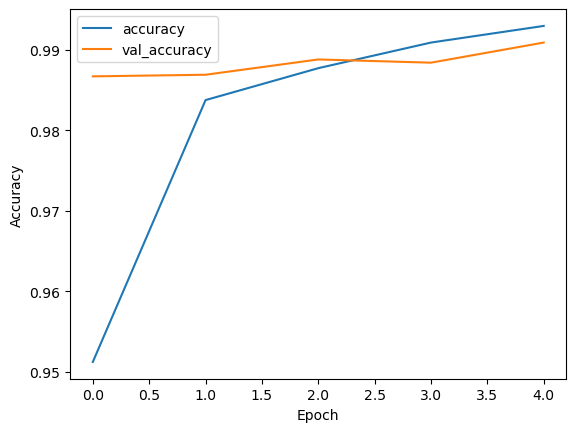

In [32]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [34]:
test_loss,test_acc = model.evaluate(test_image,test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.0288 - accuracy: 0.9909


In [35]:
train_loss,train_acc = model.evaluate(train_image,train_labels)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0159 - accuracy: 0.9951
